In [2]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Load dataset

In [3]:
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Brief EDA

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [6]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [7]:
y.describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [8]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [9]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


## Data Preprocessing

In [10]:
ct = ColumnTransformer(
    transformers=[("sex", OneHotEncoder(sparse_output=False), ["Sex"])],
    remainder= "passthrough"
)
X_trans = ct.fit_transform(X)

In [11]:
enc_cat_name = ct.named_transformers_["sex"].get_feature_names_out(["Sex"])
enc_cat_name

array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [12]:
remain_col = list(X.columns)
remain_col.remove("Sex")
all_col = list(enc_cat_name) + remain_col
all_col

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

In [13]:
X_proc = pd.DataFrame(X_trans, columns=all_col)
X_proc.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
X_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_F           4177 non-null   float64
 1   Sex_I           4177 non-null   float64
 2   Sex_M           4177 non-null   float64
 3   Length          4177 non-null   float64
 4   Diameter        4177 non-null   float64
 5   Height          4177 non-null   float64
 6   Whole_weight    4177 non-null   float64
 7   Shucked_weight  4177 non-null   float64
 8   Viscera_weight  4177 non-null   float64
 9   Shell_weight    4177 non-null   float64
dtypes: float64(10)
memory usage: 326.5 KB


## Check on Multicollinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X_vif = add_constant(X_proc)  # add constant for statsmodels
vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

           feature         VIF
0            const    0.000000
1            Sex_F         inf
2            Sex_I         inf
3            Sex_M         inf
4           Length   40.931917
5         Diameter   42.268767
6           Height    3.580125
7     Whole_weight  109.754402
8   Shucked_weight   28.548217
9   Viscera_weight   17.444893
10    Shell_weight   21.259306


c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dylon\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

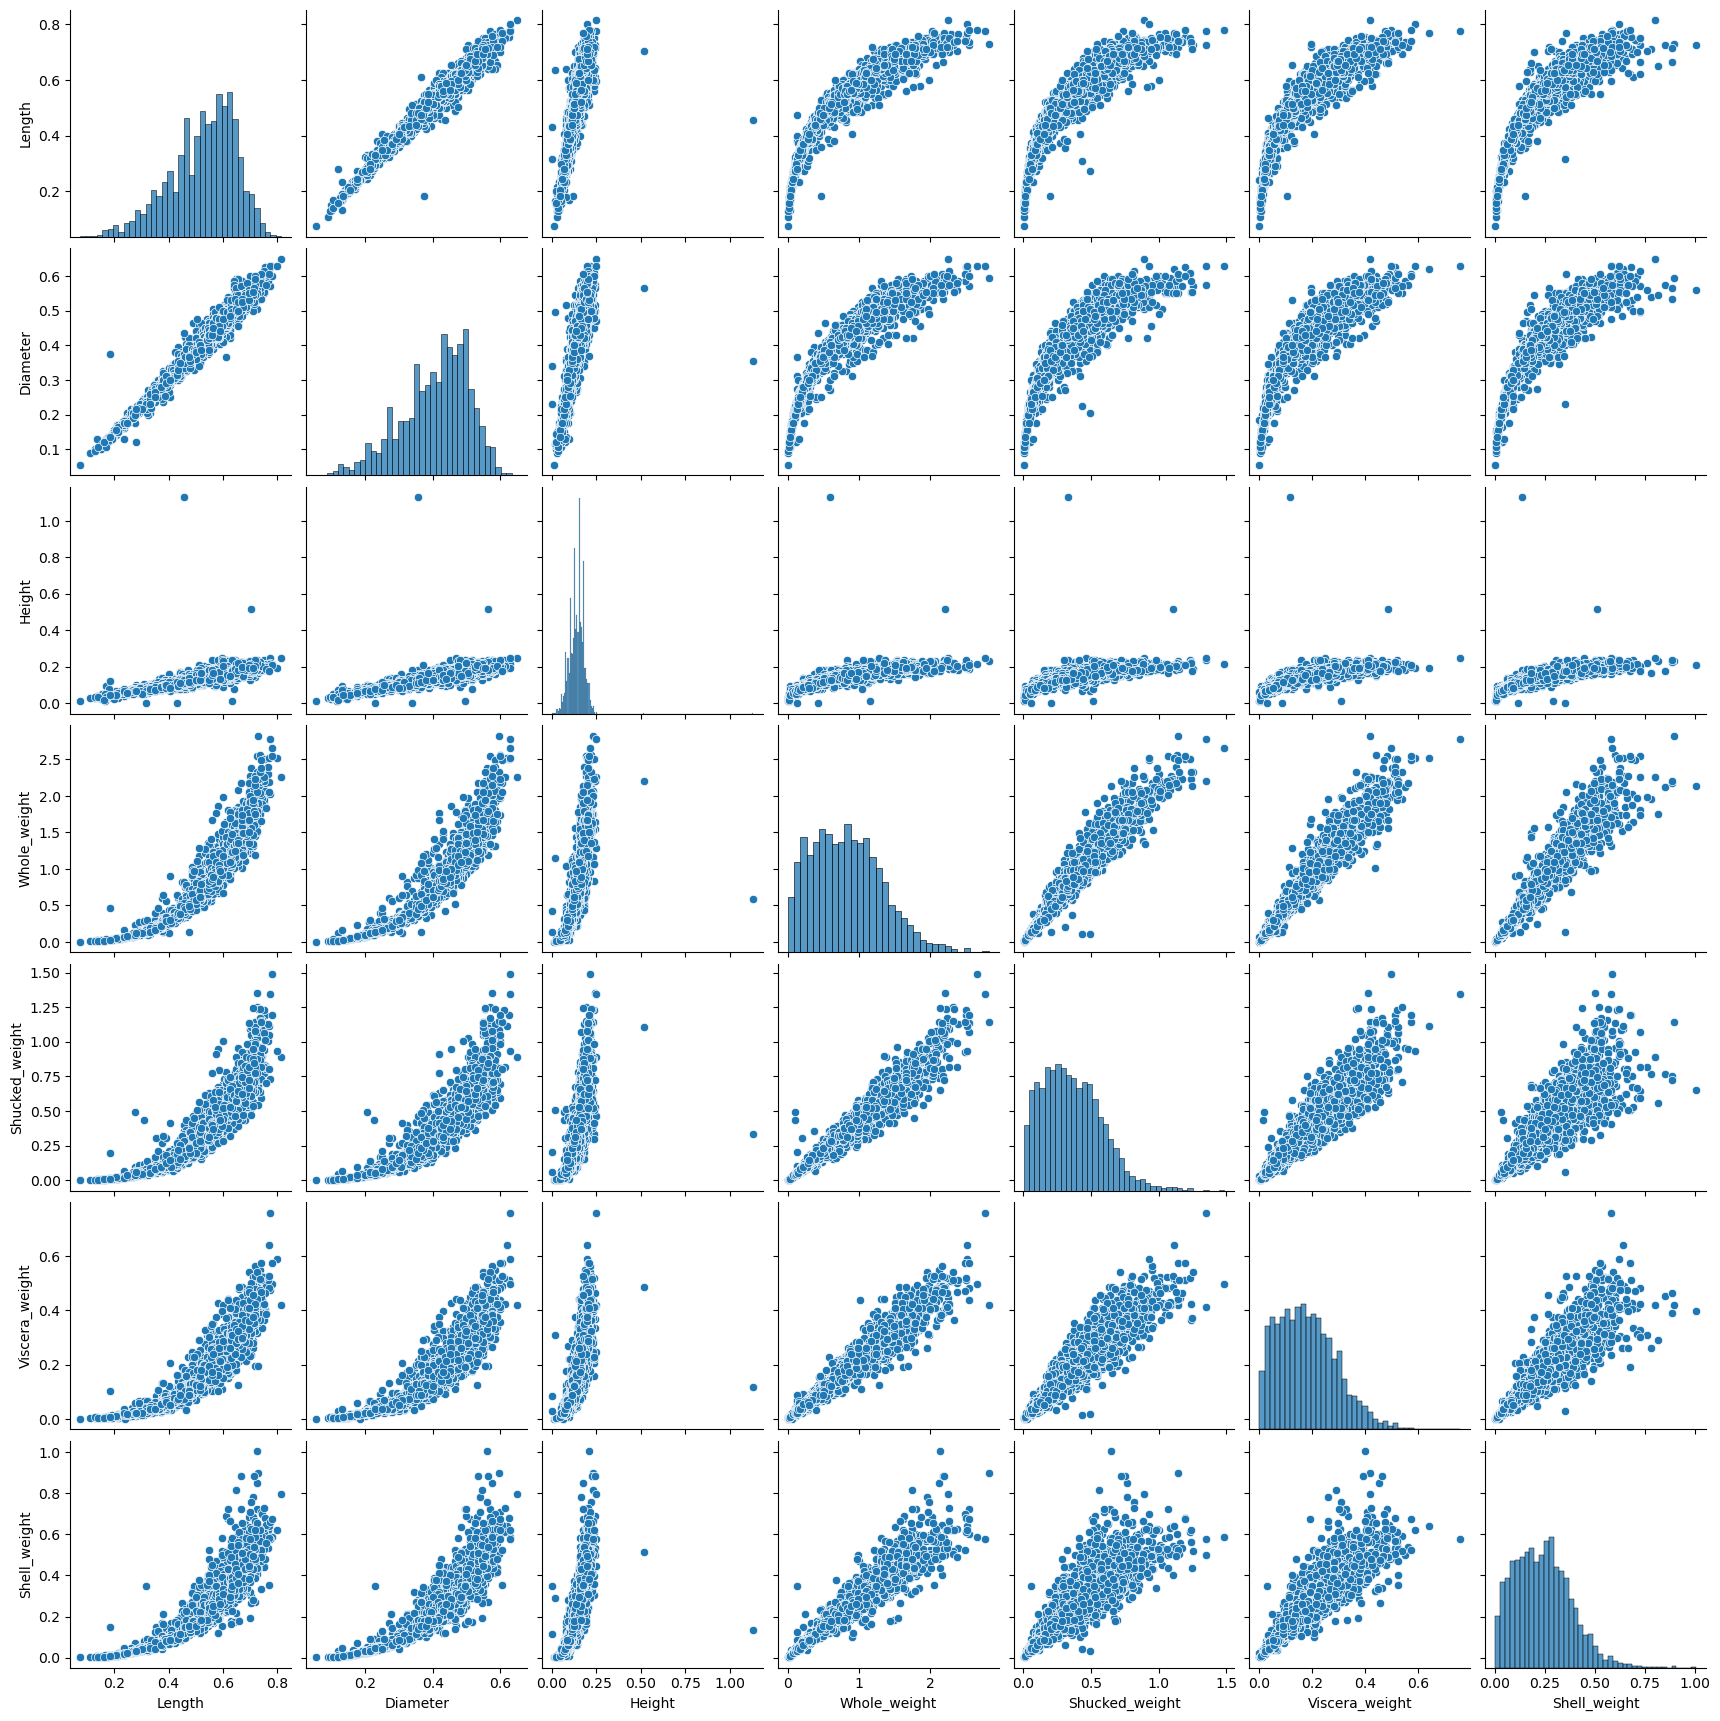

In [16]:
sns.pairplot(X)

## Features and Target to be Used

Features: X_proc

Target: y

## Split the training and testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size= 0.3, random_state=42)

## Define score table and computation

In [18]:
score_dict = {'Model': [], 'MSE': [], 'RMSE': [], 'R-squared':[]}

In [19]:
def score_computation(pred_result, model_name):
    mse = mean_squared_error(y_test, pred_result)
    rmse = root_mean_squared_error(y_test, pred_result)
    r2 = r2_score(y_test, pred_result)

    score_dict['Model'].append(model_name)
    score_dict['MSE'].append(mse)
    score_dict['RMSE'].append(rmse)
    score_dict['R-squared'].append(r2)

    print(f'{model_name} Mean Square Error: {mse}')
    print(f'{model_name} Root Mean Square Error: {rmse}')
    print(f'{model_name} R-squared: {r2}')

## KNN Model

In [20]:
knn_reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [21]:
knn_pred = knn_reg.predict(X_test)

In [22]:
score_computation(knn_pred, 'KNN (k=5)')

KNN (k=5) Mean Square Error: 4.889920255183413
KNN (k=5) Root Mean Square Error: 2.211316407749785
KNN (k=5) R-squared: 0.5184506761060917


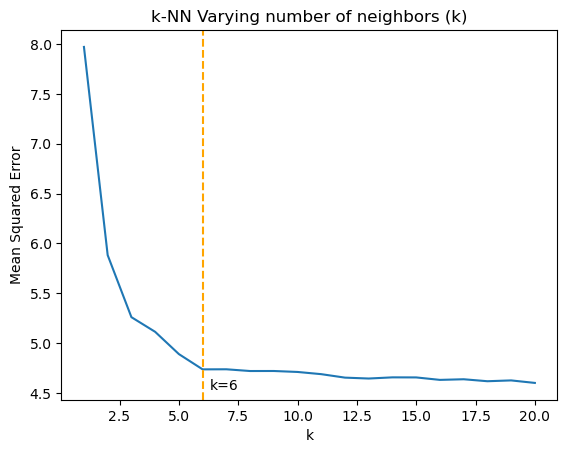

In [28]:
errors = []
for k in range(1, 21):
    knn_find_k = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred_find_k = knn_find_k.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred_find_k))

# Plotting
plt.plot(range(1, 21), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.axvline(6, linestyle='--', color='orange')
plt.text(6.3, plt.ylim()[0]+0.1, 'k=6')
plt.show()

Optimal k value = 6

In [48]:
knn_k6_reg = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

In [49]:
knn_k6_pred = knn_k6_reg.predict(X_test)

In [78]:
score_computation(knn_k6_pred, 'KNN (k=6)')

KNN (k=6) Mean Square Error: 4.736687045897573
KNN (k=6) Root Mean Square Error: 2.1763931276075956
KNN (k=6) R-squared: 0.5335407684754861


## Linear Regression Model

In [51]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [52]:
lin_pred = lin_reg.predict(X_test)

In [79]:
score_computation(lin_pred, 'Linear Regression')

Linear Regression Mean Square Error: 4.786158089955268
Linear Regression Root Mean Square Error: 2.187728980005354
Linear Regression R-squared: 0.5286689614571496


In [80]:
y_baseline = [y_train.mean()] * len(y_test)
score_computation(y_baseline, 'Baseline (using mean)')

Baseline (using mean) Mean Square Error: 10.182557979621311
Baseline (using mean) Root Mean Square Error: 3.1910120619673803
Baseline (using mean) R-squared: -0.0027574387127187183


## Apply Scaling

In [57]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [81]:
lin_reg_scale = LinearRegression().fit(X_train_scale, y_train)
lin_pred_scale = lin_reg_scale.predict(X_test_scale)
score_computation(lin_pred_scale, 'Linear Regression [with Scaling]')

Linear Regression [with Scaling] Mean Square Error: 4.785079848379856
Linear Regression [with Scaling] Root Mean Square Error: 2.1874825367028317
Linear Regression [with Scaling] R-squared: 0.5287751444774316


In [82]:
knn_k6_scale = KNeighborsRegressor(n_neighbors=6).fit(X_train_scale, y_train)
knn_k6_pred_scale = lin_reg_scale.predict(X_test_scale)
score_computation(knn_k6_pred_scale, 'KNN (k=6) [with Scaling]')

KNN (k=6) [with Scaling] Mean Square Error: 4.785079848379856
KNN (k=6) [with Scaling] Root Mean Square Error: 2.1874825367028317
KNN (k=6) [with Scaling] R-squared: 0.5287751444774316


In [83]:
df_score = pd.DataFrame(score_dict)
df_score

,Model,MSE,RMSE,R-squared
0,KNN (k=5),4.889920,2.211316,0.518451
1,KNN (k=6),4.736687,2.176393,0.533541
2,Linear Regression,4.786158,2.187729,0.528669
3,Baseline (using mean),10.182558,3.191012,-0.002757
4,Linear Regression [with Scaling],4.785080,2.187483,0.528775
5,KNN (k=6) [with Scaling],4.785080,2.187483,0.528775


In [85]:
X_proc.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Add extra feature - Volumes

In [94]:
X_proc_addVol = X_proc
X_proc_addVol['Volumes'] = X_proc['Length'] * X_proc['Diameter'] * X_proc['Height']

In [95]:
X_proc_addVol.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Volumes
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.015777
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.008347
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.030051
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.020075
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.006732


In [96]:
X_train_addVol, X_test_addVol, y_train_addVol, y_test_addVol = train_test_split(X_proc_addVol, y, test_size= 0.3, random_state=42)

In [97]:
lin_reg_addVol = LinearRegression().fit(X_train_addVol, y_train_addVol)
lin_pred_addVol = lin_reg_addVol.predict(X_test_addVol)
score_computation(lin_pred_addVol, 'Linear Regression (add feature - Volumes)')

Linear Regression (add feature - Volumes) Mean Square Error: 4.7733581619043095
Linear Regression (add feature - Volumes) Root Mean Square Error: 2.184801629874966
Linear Regression (add feature - Volumes) R-squared: 0.5299294721356818


In [98]:
df_score_addVol = pd.DataFrame(score_dict)
df_score_addVol

,Model,MSE,RMSE,R-squared
0,KNN (k=5),4.889920,2.211316,0.518451
1,KNN (k=6),4.736687,2.176393,0.533541
2,Linear Regression,4.786158,2.187729,0.528669
3,Baseline (using mean),10.182558,3.191012,-0.002757
4,Linear Regression [with Scaling],4.785080,2.187483,0.528775
5,KNN (k=6) [with Scaling],4.785080,2.187483,0.528775
6,Linear Regression (add feature - Volumes),4.773358,2.184802,0.529929
